In [ ]:
## Utiliza el API openmaps para identificar las cafeterias y 
## calcula el valor del viaje en UBER consultando el API de UBER

In [1]:
import requests
import json
import geopy as ge
import requests
import datetime
import pandas as pd
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from folium.features import DivIcon

In [3]:
# query en el mapa
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area["ISO3166-1"="PA"][admin_level=2];
(node["amenity"="cafe"](area);
 way["amenity"="cafe"](area);
 rel["amenity"="cafe"](area);
);
out center;
"""

In [4]:
response = requests.get(overpass_url, 
                        params={'data': overpass_query})

In [121]:
data = response.json()

In [120]:
#data.values()

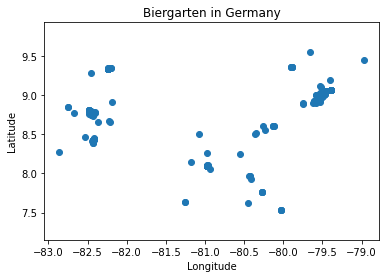

In [8]:
# Grafica los puntos en un plot
import numpy as np
import matplotlib.pyplot as plt
# Collect coords into list
coords = []
for element in data['elements']:
  if element['type'] == 'node':
    lon = element['lon']
    lat = element['lat']
    coords.append((lon, lat))
  elif 'center' in element:
    lon = element['center']['lon']
    lat = element['center']['lat']
    coords.append((lon, lat))
# Convert coordinates into numpy array
X = np.array(coords)
plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('Biergarten in Germany')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

In [123]:
#print (data['elements'][8])
#print (data['elements'][8]['lat'])
#print (data['elements'][8]['lon'])
#print (data['elements'][8]['tags'])
#print (data['elements'][8]['tags']['name'])

In [170]:
service = ge.Nominatim(user_agent = "paracredicorp@gmail.com")
origen = service.geocode("Via Argentina, Panama")
#print(origen.latitude)
#print(origen.longitude)

8.9887795
-79.5226794


In [171]:
result = pd.DataFrame()

In [147]:
def get_ride_price(origin_latitude, origin_longitude, destination_latitude, destination_longitude):
      
    url = "https://www.uber.com/api/loadFEEstimates?localeCode=en"

    payload = json.dumps({
      "origin": {
        "latitude": origin_latitude,
        "longitude": origin_longitude
      },
      "destination": {
        "latitude": destination_latitude,
        "longitude": destination_longitude
      },
      "locale": "en"
    })
    headers = {
      'content-type': 'application/json',
      'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36',
      'x-csrf-token': 'x'
    }

    response = requests.request("POST", url, headers=headers, data=payload)
      
    result1 = [[ datetime.datetime.now(), destination_latitude, destination_longitude,
               x['vehicleViewDisplayName'], x['fareString']] for x in response.json()['data']['prices']]
    result1 = pd.DataFrame(result1)
    result1.rename(columns= { 0: 'fecha', 1:'latitud', 2:'longitud',3: 'tipo', 4:'valor' }, inplace=True)
    global result
    result = result.append(result1, ignore_index=True)

In [148]:
get_ride_price(origen.latitude, origen.longitude, X[0,1], X[0,0])
print(result)

None


In [172]:
for i in range(len(X)):
    get_ride_price(origen.latitude, origen.longitude, X[i,1], X[i,0])

In [173]:
#print(result)

                          fecha   latitud   longitud         tipo    valor
0    2022-07-08 14:51:00.139710  8.914903 -79.590656   Moto Flash    $6.78
1    2022-07-08 14:51:00.139710  8.914903 -79.590656  UberX Promo    $7.66
2    2022-07-08 14:51:00.139710  8.914903 -79.590656        UberX    $8.10
3    2022-07-08 14:51:00.139710  8.914903 -79.590656    UberX VIP    $8.10
4    2022-07-08 14:51:00.139710  8.914903 -79.590656        Flash    $8.79
...                         ...       ...        ...          ...      ...
1563 2022-07-08 14:55:27.558944  8.813005 -82.483136        UberX  $426.91
1564 2022-07-08 14:55:27.558944  8.813005 -82.483136    UberX VIP  $426.91
1565 2022-07-08 14:55:27.558944  8.813005 -82.483136        Flash  $449.44
1566 2022-07-08 14:55:27.558944  8.813005 -82.483136       UberXL  $467.68
1567 2022-07-08 14:55:27.558944  8.813005 -82.483136        Black  $527.85

[1568 rows x 5 columns]


In [197]:
# Creo el mapa
m_2 = folium.Map(location=[8.9887795,-79.5226794], tiles='openstreetmap', zoom_start=14)

folium.CircleMarker(
    location=[8.9887795,-79.5226794],
    radius=10,
    popup="Via Argentina",
    color="crimson",
    fill=True,
    fill_color=False,
).add_to(m_2)

# Añadir puntos en el mapa
for idx, row in result.iterrows():
    Marker([row['latitud'], row['longitud']]).add_to(m_2)
    
m_2